In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import extract_checkpoint_rouge, plot_stacked_bar

# Training trends in rouge scores

In [2]:
stepnums = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 200000, 201000,202000, 203000]
r1s = [29.257, 30.127, 31.061, 31.685, 31.500, 31.926, 31.545, 31.688, 32.092, 31.834, 32.120, 32.638, 36.814, 36.069, 35.820]
r2s = [11.746, 12.277, 12.873, 12.970, 13.043, 13.173, 13.196, 13.037, 13.358, 13.272, 13.326, 13.736, 15.564, 15.270, 14.886]
rLs = [26.915, 27.772, 28.620, 29.058, 28.898, 29.200, 29.019, 29.053, 29.407, 29.241, 29.480, 29.894, 34.185, 33.530, 33.317]

(190000, 210000)

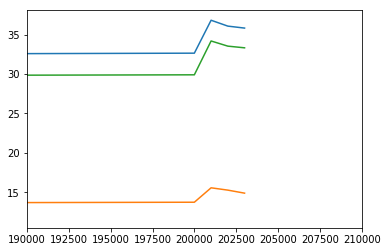

In [3]:
plt.plot(stepnums, r1s)
plt.plot(stepnums, r2s)
plt.plot(stepnums, rLs)
plt.xlim([190000, 210000])

In [4]:
checkpoints = ['checkpoints/LSTMCheckpoints1/checkpoint%i' % i for i in range(1,21)] + \
              ['checkpoints/LSTMCheckpoints1_1/checkpoint%i' % i for i in range(21,27)]
timesteps, scores = extract_checkpoint_rouge(checkpoints)

(199980, 200100)

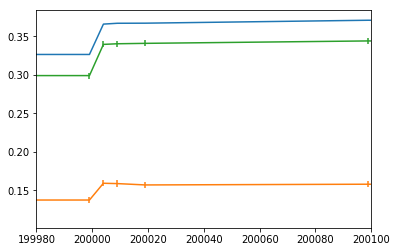

In [5]:
plt.errorbar(timesteps,
             [score['rouge_1_f_score'] for score in scores])
plt.errorbar(timesteps, [score['rouge_2_f_score'] for score in scores], yerr=[score['rouge_2_f_score_ce']-score['rouge_2_f_score_cb'] for score in scores])
plt.errorbar(timesteps, [score['rouge_l_f_score'] for score in scores], yerr=[score['rouge_l_f_score_ce']-score['rouge_l_f_score_cb'] for score in scores])
plt.xlim([199980, 200100])


# Rouge model/training variants comparison

In [6]:
timesteps, scores = extract_checkpoint_rouge([
    'checkpoints/LSTM1',
    'checkpoints/LSTM2',
    'checkpoints/LSTMCoverage2',
    'checkpoints/Transformer1',
    'checkpoints/Transformer2',
    'checkpoints/TransformerCoverage3',
    'checkpoints/LSTMCheckpoints4/checkpoint10',
    'checkpoints/LSTMCheckpoints4/checkpoint15',
    'checkpoints/LSTMCheckpoints5/checkpoint10',
    'checkpoints/LSTMCheckpoints5/checkpoint15'
])
x_ticks = ('LSTM w/o tricks', 'LSTM w/ tricks', 'Transformer w/o tricks', 'Transformer w/ tricks', 'LSTM w/ tricks+trainable-wv', 'LSTM w/ tricks+trainable-wv, p_gen = .001')
stack_labels = ('without coverage', 'with coverage')
show_nums = np.array([[0,1,0,1,1,1],[1,1,1,1,1,1]])
figsize = (20,10)

def get_rouge_scores_to_plot(rouge_key):
    without_coverage = (0, scores[1][rouge_key], 0, scores[4][rouge_key], scores[6][rouge_key], scores[8][rouge_key])
    without_coverage_std = [(0, scores[1][rouge_key]-scores[1][rouge_key+'_cb'], 0, scores[4][rouge_key]-scores[4][rouge_key+'_cb'], scores[6][rouge_key]-scores[6][rouge_key+'_cb'], scores[8][rouge_key]-scores[8][rouge_key+'_cb']),
                            #(0,0,0,0)]
                            (0, scores[1][rouge_key+'_ce']-scores[1][rouge_key], 0, scores[4][rouge_key+'_ce']-scores[4][rouge_key], scores[6][rouge_key+'_ce']-scores[6][rouge_key], scores[8][rouge_key+'_ce']-scores[8][rouge_key])]
    with_coverage = (scores[0][rouge_key], scores[2][rouge_key]-without_coverage[1], scores[3][rouge_key], scores[5][rouge_key]-without_coverage[3], scores[7][rouge_key]-without_coverage[4], scores[9][rouge_key]-without_coverage[5])
    with_coverage_std = [(scores[0][rouge_key]-scores[0][rouge_key+'_cb'], scores[2][rouge_key]-scores[2][rouge_key+'_cb'], scores[3][rouge_key]-scores[3][rouge_key+'_cb'], scores[5][rouge_key]-scores[5][rouge_key+'_cb'], scores[7][rouge_key]-scores[7][rouge_key+'_cb'], scores[9][rouge_key]-scores[9][rouge_key+'_cb']),
                         (scores[0][rouge_key+'_ce']-scores[0][rouge_key], scores[2][rouge_key+'_ce']-scores[2][rouge_key], scores[3][rouge_key+'_ce']-scores[3][rouge_key], scores[5][rouge_key+'_ce']-scores[5][rouge_key], scores[7][rouge_key+'_ce']-scores[7][rouge_key], scores[9][rouge_key+'_ce']-scores[9][rouge_key])]
    data = ((without_coverage, without_coverage_std), (with_coverage, with_coverage_std))
    return data

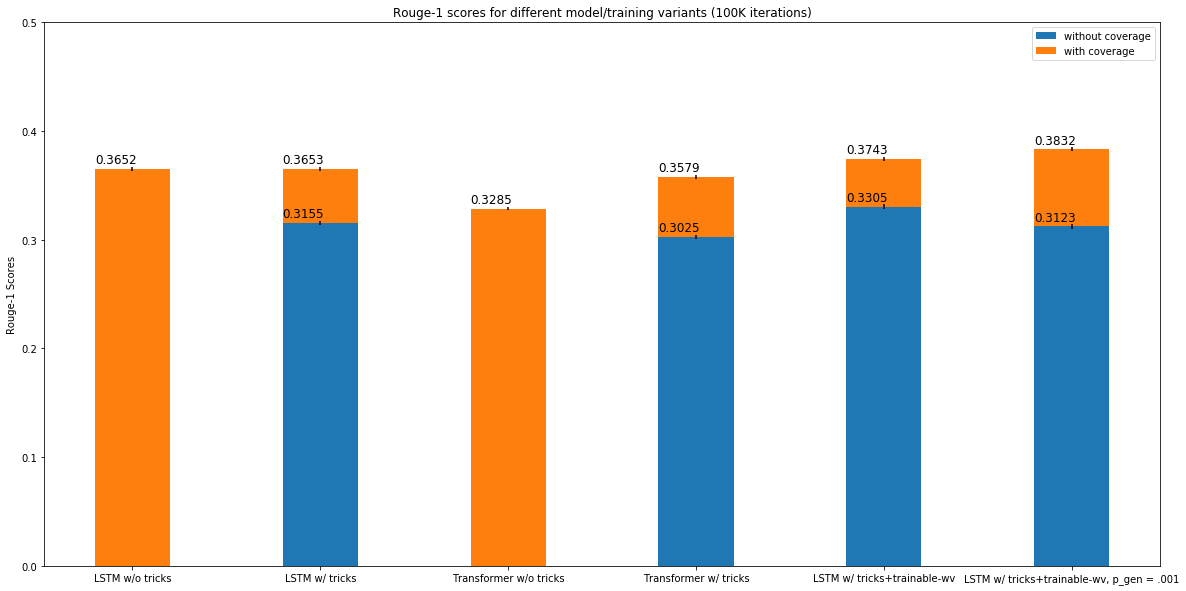

In [7]:
data = get_rouge_scores_to_plot('rouge_1_f_score')
plot_stacked_bar(data, x_ticks=x_ticks, stack_labels=stack_labels, y_label='Rouge-1 Scores', title='Rouge-1 scores for different model/training variants (100K iterations)', show_nums=show_nums, y_lim=[0., .5], file='Rouge1.png', figsize=figsize)


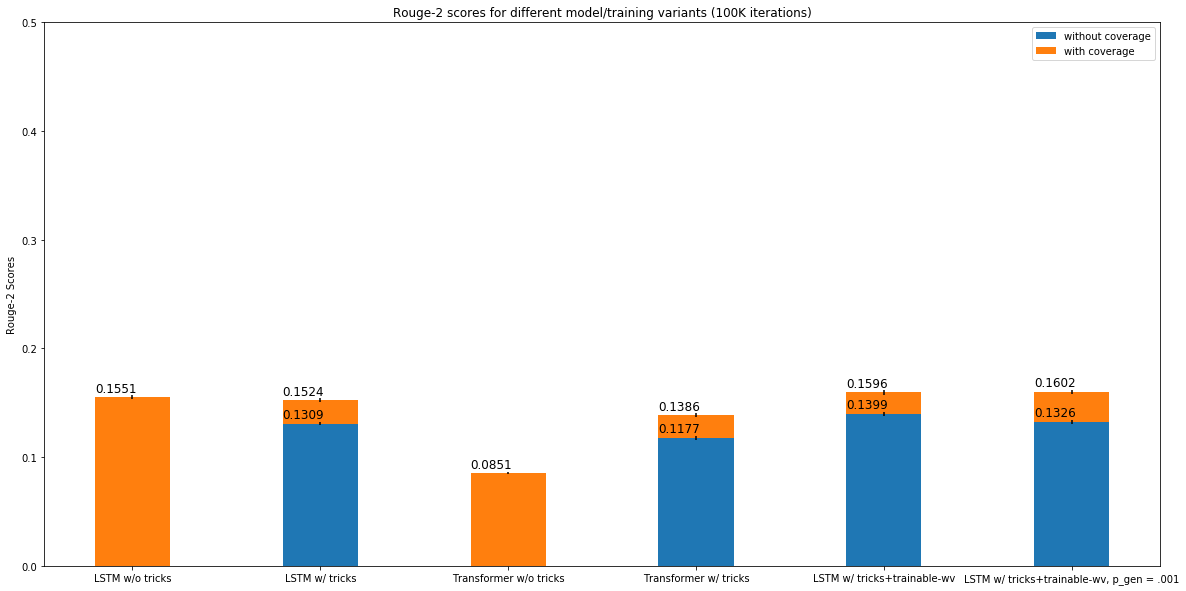

In [8]:
data = get_rouge_scores_to_plot('rouge_2_f_score')
plot_stacked_bar(data, x_ticks=x_ticks, stack_labels=stack_labels, y_label='Rouge-2 Scores', title='Rouge-2 scores for different model/training variants (100K iterations)', show_nums=show_nums, y_lim=[0., .5], file='Rouge2.png', figsize=figsize)


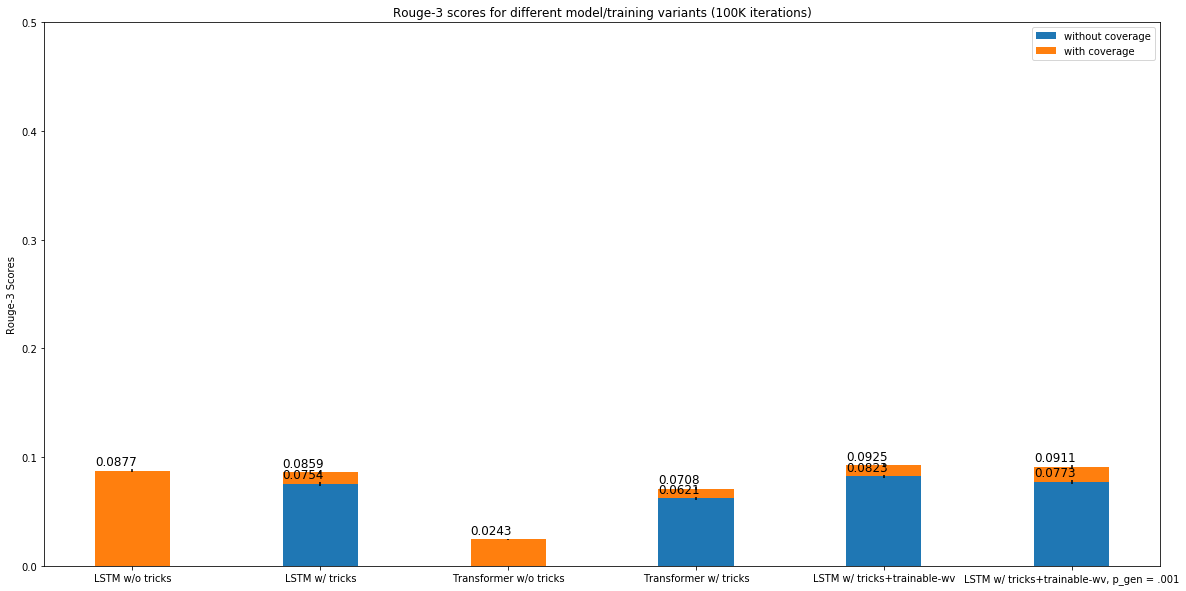

In [10]:
data = get_rouge_scores_to_plot('rouge_3_f_score')
plot_stacked_bar(data, x_ticks=x_ticks, stack_labels=stack_labels, y_label='Rouge-3 Scores', title='Rouge-3 scores for different model/training variants (100K iterations)', show_nums=show_nums, y_lim=[0., .5], file='Rouge3.png', figsize=figsize)


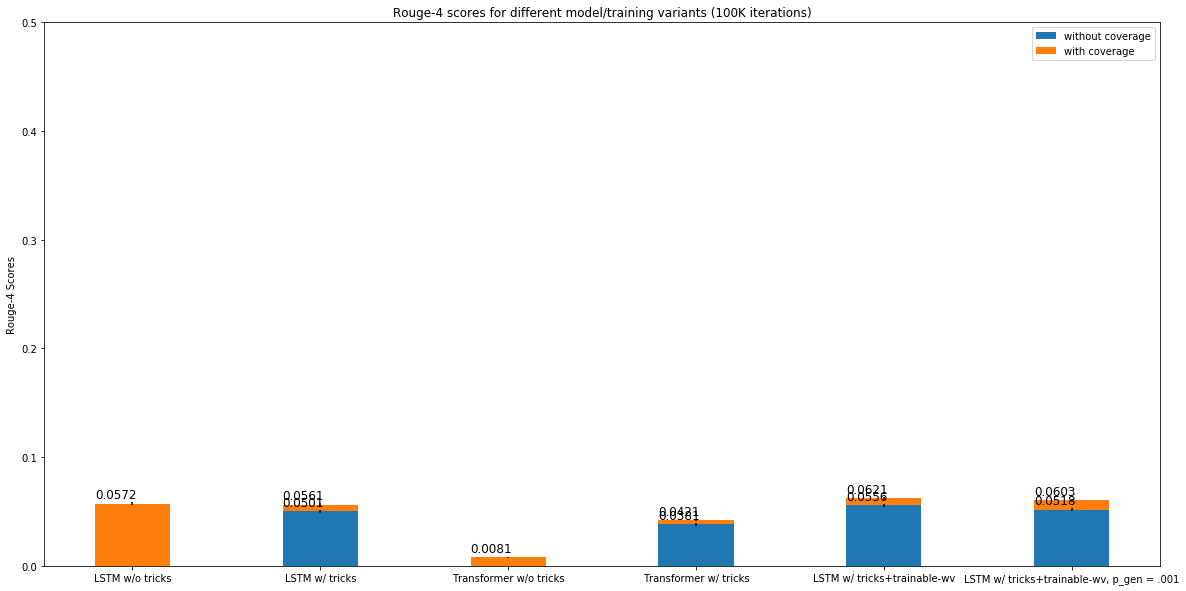

In [11]:
data = get_rouge_scores_to_plot('rouge_4_f_score')
plot_stacked_bar(data, x_ticks=x_ticks, stack_labels=stack_labels, y_label='Rouge-4 Scores', title='Rouge-4 scores for different model/training variants (100K iterations)', show_nums=show_nums, y_lim=[0., .5], file='Rouge4.png', figsize=figsize)


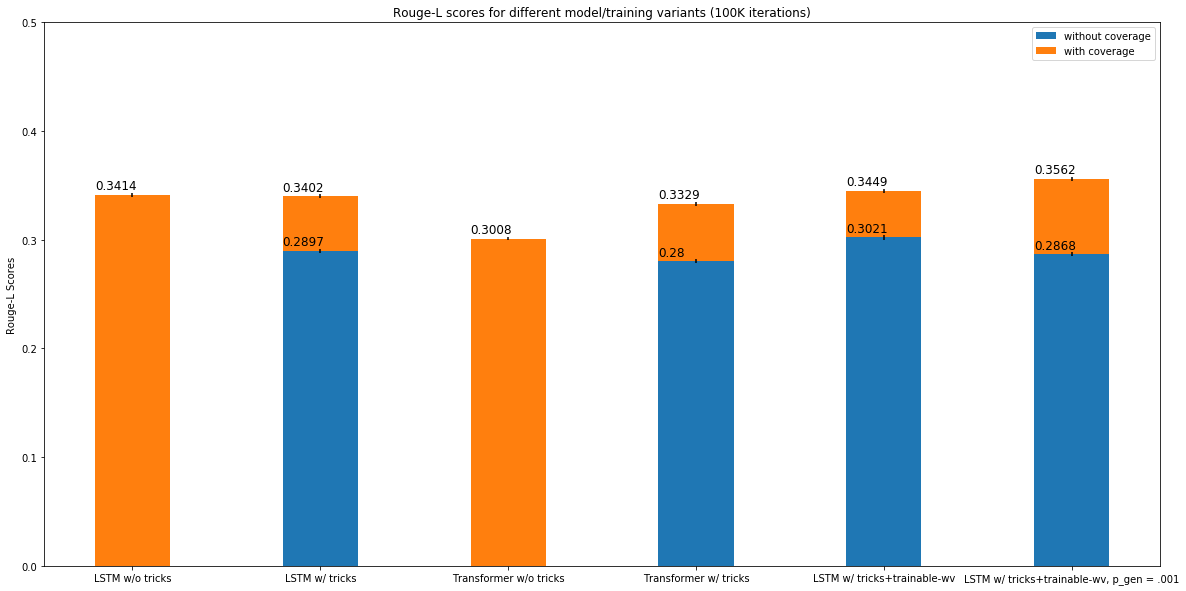

In [9]:
data = get_rouge_scores_to_plot('rouge_l_f_score')
plot_stacked_bar(data, x_ticks=x_ticks, stack_labels=stack_labels, y_label='Rouge-L Scores', title='Rouge-L scores for different model/training variants (100K iterations)', show_nums=show_nums, y_lim=[0., .5], file='RougeL.png', figsize=figsize)
